In [1]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic


import warnings
warnings.filterwarnings('ignore')

In [2]:
raw = pd.read_csv('weather_classification_data.csv')
raw.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [4]:
raw.describe(include='all')

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
count,13200.000000,13200.000000,13200.000000,13200.000000,13200,13200.000000,13200.000000,13200,13200.000000,13200,13200
unique,NaN,NaN,NaN,NaN,4,NaN,NaN,4,NaN,3,4
top,NaN,NaN,NaN,NaN,overcast,NaN,NaN,Winter,NaN,inland,Rainy
freq,NaN,NaN,NaN,NaN,6090,NaN,NaN,5610,NaN,4816,3300
mean,19.127576,68.710833,9.832197,53.644394,NaN,1005.827896,4.005758,NaN,5.462917,NaN,NaN
std,17.386327,20.194248,6.908704,31.946541,NaN,37.199589,3.856600,NaN,3.371499,NaN,NaN
min,-25.000000,20.000000,0.000000,0.000000,NaN,800.120000,0.000000,NaN,0.000000,NaN,NaN
25%,4.000000,57.000000,5.000000,19.000000,NaN,994.800000,1.000000,NaN,3.000000,NaN,NaN
50%,21.000000,70.000000,9.000000,58.000000,NaN,1007.650000,3.000000,NaN,5.000000,NaN,NaN
75%,31.000000,84.000000,13.500000,82.000000,NaN,1016.772500,7.000000,NaN,7.500000,NaN,NaN


In [5]:
[print(f"{col}: {raw[col].value_counts()}") for col in raw.select_dtypes(include=['object']).columns]

Cloud Cover: Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64
Season: Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64
Location: Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64
Weather Type: Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


[None, None, None, None]

<b>Rename columns</b>

In [6]:
raw.rename(columns={'Precipitation (%)':'Precipitation', 'Visibility (km)':'Visibility'}, inplace=True)
for col in raw.columns:
    raw.rename(columns={col: col.replace(' ', '_')}, inplace=True)
raw.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation', 'Cloud_Cover',
       'Atmospheric_Pressure', 'UV_Index', 'Season', 'Visibility', 'Location',
       'Weather_Type'],
      dtype='object')

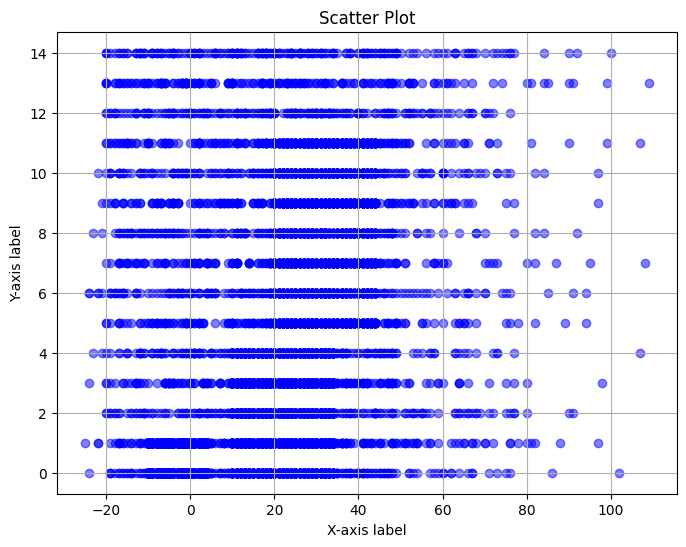

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  
plt.scatter(raw['Temperature'], raw['UV_Index'], color='blue', alpha=0.5)  

plt.title('Scatter Plot')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

plt.grid(True)  
plt.show()

<b>No missing values in the dataset</b>

In [9]:
cols_with_null = {}
for col in raw.columns:
    current_null_count = raw[col].isnull().sum()
    if current_null_count>0:
        cols_with_null[col] = current_null_count
print(f"Total of {len(cols_with_null)} columns with null values")

Total of 0 columns with null values


<b>Even distribution of target class</b>

<Axes: xlabel='Weather_Type'>

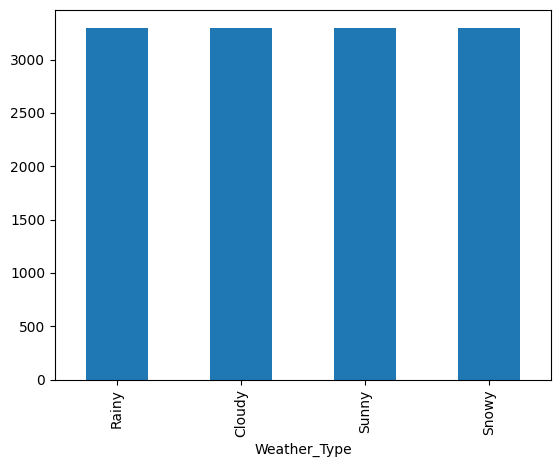

In [17]:
raw['Weather_Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Season'>

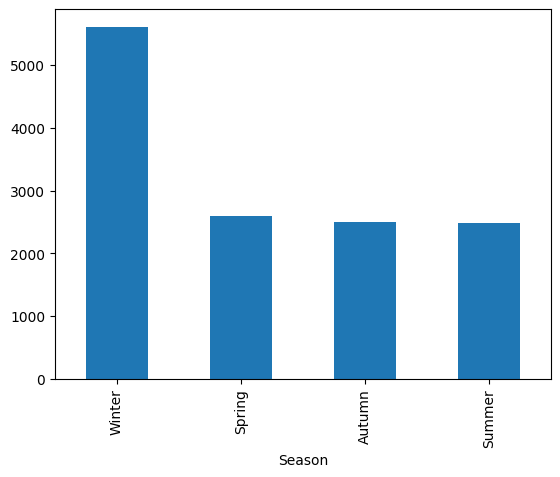

In [19]:
raw['Season'].value_counts().plot(kind='bar')

<Axes: xlabel='Location'>

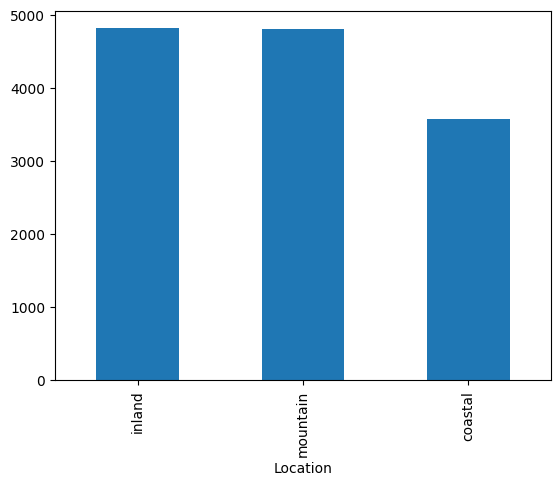

In [20]:
raw['Location'].value_counts().plot(kind='bar')

<Axes: title={'center': 'UV_Index'}, xlabel='Season'>

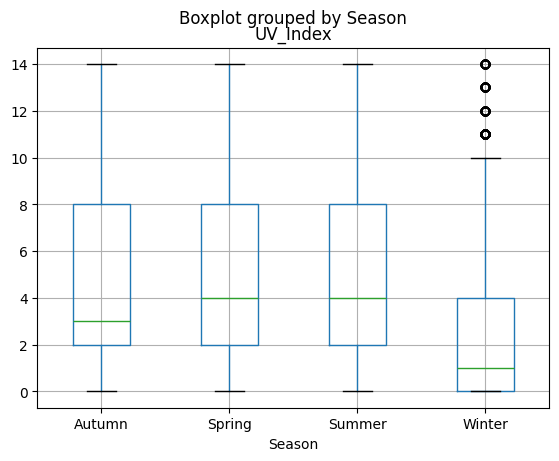

In [67]:
raw.boxplot(column='UV_Index', by='Season')

(<Figure size 640x480 with 3 Axes>,
 {('inland', 'partly cloudy'): (0.0,
   0.0,
   0.36123612361236124,
   0.3322259136212624),
  ('inland', 'clear'): (0.0,
   0.33552624365426575,
   0.36123612361236124,
   0.14103154501496665),
  ('inland', 'overcast'): (0.0,
   0.47985811870223566,
   0.36123612361236124,
   0.491554554126509),
  ('inland', 'cloudy'): (0.0,
   0.974713002861748,
   0.36123612361236124,
   0.025286997138252),
  ('mountain', 'partly cloudy'): (0.3661866186618662,
   0.0,
   0.36101110111011103,
   0.32605587589716795),
  ('mountain', 'clear'): (0.3661866186618662,
   0.3293562059301713,
   0.36101110111011103,
   0.14626228880939204),
  ('mountain', 'overcast'): (0.3661866186618662,
   0.4789188247725666,
   0.36101110111011103,
   0.49042095150715986),
  ('mountain', 'cloudy'): (0.3661866186618662,
   0.9726401063127298,
   0.36101110111011103,
   0.027359893687270237),
  ('coastal', 'partly cloudy'): (0.7321482148214822,
   0.0,
   0.2678517851785178,
   0.37679769

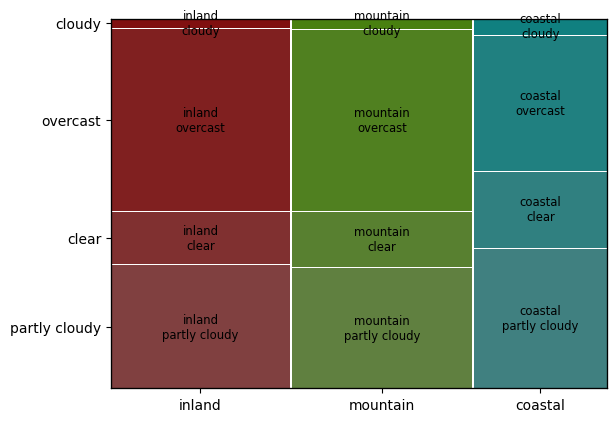

In [73]:
mosaic(raw, ['Location', 'Cloud_Cover'])

In [17]:
#function for counting group-level outliers based on boxplot
def count_outliers_by(group, grouped_by, by_column):
    q1 = group[by_column].quantile(0.25)
    q3 = group[by_column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    lower_outliers_cnt = group[group[by_column] < lower_bound].shape[0]
    upper_outliers_cnt = group[group[by_column] > upper_bound].shape[0]

    print(f"{grouped_by}: {group.name}, attribute: {by_column}, lower outliers {lower_outliers_cnt}, upper outliers {upper_outliers_cnt}")

In [12]:
numeric_cols = raw.select_dtypes(include='number').columns
print("The numeric columns are: ", numeric_cols)

categorical_cols = list(set(raw.columns) - set(numeric_cols))
print("The categorical columns are: ", categorical_cols)

The numeric columns are:  Index(['Temperature', 'Humidity', 'Wind_Speed', 'Precipitation',
       'Atmospheric_Pressure', 'UV_Index', 'Visibility'],
      dtype='object')
The categorical columns are:  ['Cloud_Cover', 'Weather_Type', 'Location', 'Season']


In [18]:
for col in numeric_cols:
    raw.groupby('Season').apply(count_outliers_by, grouped_by='Season', by_column=col)
    print("\n")

Season: Autumn, attribute: Temperature, lower outliers 70, upper outliers 71
Season: Spring, attribute: Temperature, lower outliers 85, upper outliers 72
Season: Summer, attribute: Temperature, lower outliers 63, upper outliers 73
Season: Winter, attribute: Temperature, lower outliers 0, upper outliers 28


Season: Autumn, attribute: Humidity, lower outliers 0, upper outliers 0
Season: Spring, attribute: Humidity, lower outliers 0, upper outliers 0
Season: Summer, attribute: Humidity, lower outliers 0, upper outliers 0
Season: Winter, attribute: Humidity, lower outliers 104, upper outliers 0


Season: Autumn, attribute: Wind_Speed, lower outliers 0, upper outliers 81
Season: Spring, attribute: Wind_Speed, lower outliers 0, upper outliers 57
Season: Summer, attribute: Wind_Speed, lower outliers 0, upper outliers 75
Season: Winter, attribute: Wind_Speed, lower outliers 0, upper outliers 154


Season: Autumn, attribute: Precipitation, lower outliers 0, upper outliers 0
Season: Spring, att

In [9]:
outliers_summarized = raw.groupby('Season').apply(count_outliers_by, grouped_by='Season', by_column='Temperature')

Season: Autumn, lower outliers 70, upper outliers 71
Season: Spring, lower outliers 85, upper outliers 72
Season: Summer, lower outliers 63, upper outliers 73
Season: Winter, lower outliers 0, upper outliers 28
